# Missouri Duck Harvest Data

## Overview
In this notebook we will pull down the data from the Missouri Department of Conservation website. Once the data is downloaded, we will save and parse it to get a create a graph to get a better view of how many ducks were killed during different times.

Steps:
- Download the harvest data from the website
- Save the json output so we don't have to request the data each time (data from past years seem to be removed after awhile)
- Parse the json data to get the information we are interested in

## Download Harvest Data

### 01. Setup Imports and Variables

Setup imports to perform the web requests and save the data to a file.

In [1]:
import os
import time
import requests

ZONES = "conservation_areas.csv"
DIRECTORY = "data/harvest"
SEASONS = ["2016-2017","2017-2018","2018-2019","2019-2020","2020-2021"]

### 02. Setup Zone Information
Read in the file with the locations/zones

In [2]:
conservationData = []

try:
    if os.path.exists(ZONES):
        f = open(ZONES, "r")
        l = f.readlines()[1:]
        for x in l:
            zd = x.split(",")[0]
            conservationData.append(zd.strip())
        f.close()
        print("[+] Successfully read in conservation data")
    else:
        print("File does not exist: " + ZONES)
except:
    print("Error reading file: " + ZONES)

[+] Successfully read in conservation data


### 03. Web Request Function
Function to send a web request to the website to pull down the harvest data bases on the season and zone.

In [3]:
def getReport(zone, season):
    URL = "https://extra.mdc.mo.gov/widgets/wtrfwl_harvest/dataJSONservice.php"
    headers = {
        "User-Agent" : "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0",
        "Accept" : "*/*",
        "Accept-Language" : "en-US,en;q=0.5",
        "Accept-Encoding" : "gzip, deflate",
        "Content-Type" : "application/x-www-form-urlencoded; charset=UTF-8",
        "X-Requested-With" : "XMLHttpRequest",
        "Origin" : "https://extra.mdc.mo.gov",
        "Referer" : "https://extra.mdc.mo.gov/widgets/wtrfwl_harvest/"
    }
    param = {"paravalue" : "?areas=" + zone + "&season=" + season}

    sf = DIRECTORY + "/" + season + "_" + zone + ".json"

    try:
        if not os.path.exists(sf):
            r = requests.post(URL, data = param, headers = headers)
            f = open(sf, "w")
            f.write(r.text)
            f.close()
            print("Wrote file: " + sf)
        else:
            print(sf + " already exists")
    except:
        print("Error")

### 04. Download Data
Loop through each year and pull down the data for each of the hunting zones. Note: Some of the past years may not be online anymore.

In [4]:
for zone in conservationData:
    for season in SEASONS:
        getReport(zone, season)
        time.sleep(.1)

data/harvest/2016-2017_8514.json already exists
data/harvest/2017-2018_8514.json already exists
data/harvest/2018-2019_8514.json already exists
data/harvest/2019-2020_8514.json already exists
data/harvest/2020-2021_8514.json already exists
data/harvest/2016-2017_8241.json already exists
data/harvest/2017-2018_8241.json already exists
data/harvest/2018-2019_8241.json already exists
data/harvest/2019-2020_8241.json already exists
data/harvest/2020-2021_8241.json already exists
data/harvest/2016-2017_5004.json already exists
data/harvest/2017-2018_5004.json already exists
data/harvest/2018-2019_5004.json already exists
data/harvest/2019-2020_5004.json already exists
data/harvest/2020-2021_5004.json already exists
data/harvest/2016-2017_5701.json already exists
data/harvest/2017-2018_5701.json already exists
data/harvest/2018-2019_5701.json already exists
data/harvest/2019-2020_5701.json already exists
data/harvest/2020-2021_5701.json already exists
data/harvest/2016-2017_8238.json already

## Parse Data

### 05. Load the Data
Import pandas to parse and display the data. Then load all of the json data and view the columns.

In [5]:
import pandas as pd
import glob

# An empty list to store the data frames
dfs = []

# Get the list of all the json files
json_pattern = os.path.join(DIRECTORY,'*.json')
file_list = glob.glob(json_pattern)

# Read each json file and add to the data  
for file in file_list:
    data = pd.read_json(file, lines=True) # read data frame from json file
    dfs.append(data) # append the data frame to the list

# Concatenate all the data frames in the list
temp = pd.concat(dfs, ignore_index=True)

# List the columns
temp.columns.tolist()

['wfHrv_Updates_Recs']

### 06. Preview
Preview the data to determine the columns inside of "wfHrv_Updates_Recs".

In [6]:
temp["wfHrv_Updates_Recs"]

0     [{'RecId': 48, 'Area': 'Grand Pass CA', 'Seaso...
1     [{'RecId': 1241, 'Area': 'Ten Mile Pond CA', '...
2     [{'RecId': 57, 'Area': 'Fountain Grove CA', 'S...
3     [{'RecId': 3196, 'Area': 'Marais Temps Clair C...
4     [{'RecId': 3164, 'Area': 'Otter Slough CA', 'S...
                            ...                        
70    [{'RecId': 935, 'Area': 'Grand Pass CA', 'Seas...
71    [{'RecId': 2619, 'Area': 'Montrose CA', 'Seaso...
72    [{'RecId': 3131, 'Area': 'Duck Creek CA', 'Sea...
73    [{'RecId': 76, 'Area': 'Otter Slough CA', 'Sea...
74    [{'RecId': 129, 'Area': 'Schell-Osage CA', 'Se...
Name: wfHrv_Updates_Recs, Length: 75, dtype: object

### 07. Cleanup
Now that we know what the keys are of the json data, we need to cleanup the dataframe to get a better view. Below we reload each file and normalize the data into a flat table. We then combine each of the lists into one.

In [7]:
dfs2 = []
for file in file_list:
    data = pd.read_json(file)
    dfs2.append(pd.json_normalize(data['wfHrv_Updates_Recs']))

temp2 = pd.concat(dfs2, ignore_index=True)
temp2.head()

,RecId,Area,Season,Week,Report_Date,Duck_Pop,Goose_Pop,Duck_Harv,CG_Harv,SBG_Harv,...,Num_Hunters,Birds_Per_Hunt,Ducks_Per_Hunt,Blind_Vac,Wade_Vac,Total_Pos,PL_Avail,PL_Draw,Comments,Area_ID
0,48,Grand Pass CA,2016-2017,0,2016-10-22T00:00:00,12500.0,NaN,118,0,0,...,36.0,3.28,3.28,0,0,16.0,16,26,None,8010
1,49,Grand Pass CA,2016-2017,0,2016-10-23T00:00:00,NaN,NaN,56,0,0,...,20.0,2.80,2.80,0,0,NaN,0,0,None,8010
2,65,Grand Pass CA,2016-2017,1,2016-10-29T00:00:00,14000.0,NaN,273,0,0,...,58.0,4.71,4.71,0,0,15.0,7,29,None,8010
3,66,Grand Pass CA,2016-2017,1,2016-10-30T00:00:00,14000.0,NaN,182,0,0,...,58.0,3.14,3.14,0,0,15.0,7,26,"Current area population is approximately 14,00...",8010
4,87,Grand Pass CA,2016-2017,2,2016-10-31T00:00:00,14000.0,NaN,103,0,0,...,48.0,2.15,2.15,0,0,16.0,9,12,None,8010


### 08. Searching Data - Ducks Per Season
Now we will do some basic searches of the data to see what we have. First we will get the total number of ducks killed per season.

In [8]:
import numpy as np
y2016 = 0
y2017 = 0
y2018 = 0
y2019 = 0
y2020 = 0

index = 0
for rd in temp2["Season"]:
    year = int(rd.split("-")[0])
    ducks = temp2["Duck_Harv"][index]
    if np.isnan(ducks):
        continue
    
    if year == 2016:
        y2016 += ducks
    elif year == 2017:
        y2017 += ducks
    elif year == 2018:
        y2018 += ducks
    elif year == 2019:
        y2019 += ducks
    elif year == 2020:
        y2020 += ducks
    else:
        continue
        
    index += 1
    
print("2016: " + str(y2016))
print("2017: " + str(y2017))
print("2018: " + str(y2018))
print("2019: " + str(y2019))
print("2020: " + str(y2020))

2016: 75197
2017: 89098
2018: 59192
2019: 44211
2020: 52123


### 09. Searching Data - Hunters Per Season
Search how many hunters per season.

In [9]:
hy2016 = 0
hy2017 = 0
hy2018 = 0
hy2019 = 0
hy2020 = 0

index = 0
for rd in temp2["Season"]:
    year = int(rd.split("-")[0])
    hunters = temp2["Num_Hunters"][index]
    if np.isnan(hunters):
        continue
    
    if year == 2016:
        hy2016 += hunters
    elif year == 2017:
        hy2017 += hunters
    elif year == 2018:
        hy2018 += hunters
    elif year == 2019:
        hy2019 += hunters
    elif year == 2020:
        hy2020 += hunters
    else:
        continue
        
    index += 1
    
print("2016: " + str(hy2016))
print("2017: " + str(hy2017))
print("2018: " + str(hy2018))
print("2019: " + str(hy2019))
print("2020: " + str(hy2020))

2016: 17814.0
2017: 22457.0
2018: 33657.0
2019: 25652.0
2020: 19356.0


### 10. Searching Data - Ducks Per Month
Searching how many ducks harvested per month.

In [10]:
months16 = np.zeros(12)
months17 = np.zeros(12)
months18 = np.zeros(12)
months19 = np.zeros(12)
months20 = np.zeros(12)

index = 0
for rd in temp2["Season"]:
    year = int(rd.split("-")[0])
    ducks = temp2["Duck_Harv"][index]
    m = pd.to_datetime(temp2["Report_Date"][index]).month
    if np.isnan(ducks):
        continue
    
    if year == 2016:
        months16[m-1] += ducks
    elif year == 2017:
        months17[m-1] += ducks
    elif year == 2018:
        months18[m-1] += ducks
    elif year == 2019:
        months19[m-1] += ducks
    elif year == 2020:
        months20[m-1] += ducks
    else:
        continue 
        
    index += 1

print("2016 Season Data:")
print("January:   " + str(months16[0]))
print("February:  " + str(months16[1]))
print("March:     " + str(months16[2]))
print("April:     " + str(months16[3]))
print("May:       " + str(months16[4]))
print("June:      " + str(months16[5]))
print("July:      " + str(months16[6]))
print("August:    " + str(months16[7]))
print("September: " + str(months16[8]))
print("October:   " + str(months16[9]))
print("November:  " + str(months16[10]))
print("December:  " + str(months16[11]))

2016 Season Data:
January:   2535.0
February:  0.0
March:     0.0
April:     0.0
May:       0.0
June:      0.0
July:      0.0
August:    0.0
September: 0.0
October:   3097.0
November:  35972.0
December:  33593.0


### 11. Searching Data - Hunters Per Month
Searching how many hunters per month.

In [11]:
hmonths16 = np.zeros(12)
hmonths17 = np.zeros(12)
hmonths18 = np.zeros(12)
hmonths19 = np.zeros(12)
hmonths20 = np.zeros(12)

index = 0
for rd in temp2["Season"]:
    year = int(rd.split("-")[0])
    hunters = temp2["Num_Hunters"][index]
    m = pd.to_datetime(temp2["Report_Date"][index]).month
    if np.isnan(hunters):
        continue
    
    if year == 2016:
        hmonths16[m-1] += hunters
    elif year == 2017:
        hmonths17[m-1] += hunters
    elif year == 2018:
        hmonths18[m-1] += hunters
    elif year == 2019:
        hmonths19[m-1] += hunters
    elif year == 2020:
        hmonths20[m-1] += hunters
    else:
        continue 
        
    index += 1

print("2016 Season Data:")
print("January:   " + str(hmonths16[0]))
print("February:  " + str(hmonths16[1]))
print("March:     " + str(hmonths16[2]))
print("April:     " + str(hmonths16[3]))
print("May:       " + str(hmonths16[4]))
print("June:      " + str(hmonths16[5]))
print("July:      " + str(hmonths16[6]))
print("August:    " + str(hmonths16[7]))
print("September: " + str(hmonths16[8]))
print("October:   " + str(hmonths16[9]))
print("November:  " + str(hmonths16[10]))
print("December:  " + str(hmonths16[11]))

2016 Season Data:
January:   180.0
February:  0.0
March:     0.0
April:     0.0
May:       0.0
June:      0.0
July:      0.0
August:    0.0
September: 0.0
October:   733.0
November:  8600.0
December:  8301.0


## Graphs
### 12. Line Graph
Create a graph of the ducks killed per season.

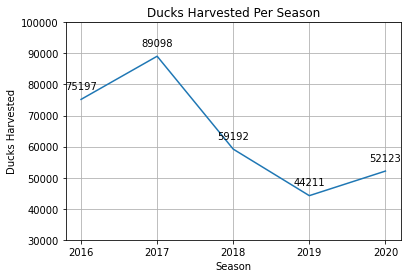

In [19]:
# import the matplotlib library to create graphs
import matplotlib.pyplot as plt

years = ["2016","2017","2018","2019","2020"]
dh = [y2016,y2017,y2018,y2019,y2020]

plt.axis([None, None, 30000, 100000])
plt.title('Ducks Harvested Per Season')
plt.xlabel('Season')
plt.ylabel('Ducks Harvested')
plt.plot(years, dh)

for x, y in zip(years,dh):
    label = y
    plt.annotate(label, # this is the text
        (x,y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center
    
plt.grid()
# show and save the graph
plt.savefig('media/ducks_per_season.png', facecolor='white')

Split it out into ducks killer per month.

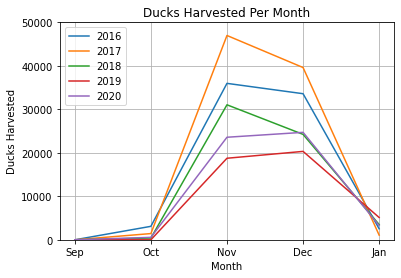

In [20]:
m = ["Sep","Oct","Nov","Dec", "Jan"]

plt.axis([None, None, 0, 50000])
plt.title('Ducks Harvested Per Month')
plt.xlabel('Month')
plt.ylabel('Ducks Harvested')
plt.plot(m, np.append(months16[8:], months16[0:1]), label="2016")
plt.plot(m, np.append(months17[8:], months17[0:1]), label="2017")
plt.plot(m, np.append(months18[8:], months18[0:1]), label="2018")
plt.plot(m, np.append(months19[8:], months19[0:1]), label="2019")
plt.plot(m, np.append(months20[8:], months20[0:1]), label="2020")    
plt.grid(True)
plt.legend(loc="upper left")

# show and save the graph
plt.savefig('media/ducks_per_month.png', facecolor='white')

Create a graph of the hunters per season.

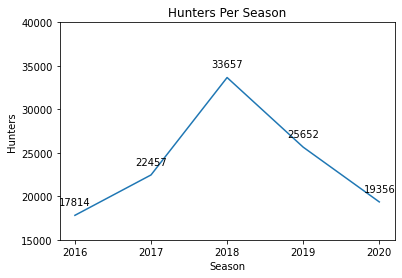

In [21]:
hy = ["2016","2017","2018","2019","2020"]
hdh = [hy2016,hy2017,hy2018,hy2019,hy2020]

plt.axis([None, None, 15000, 40000])
plt.title('Hunters Per Season')
plt.xlabel('Season')
plt.ylabel('Hunters')
plt.plot(hy, hdh)
for x, y in zip(hy,hdh):
    label = int(y)
    plt.annotate(label, # this is the text
        (x,y), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center

# show and save the graph
plt.savefig('media/hunters_per_season.png', facecolor='white')

Split it out into hunters per month.

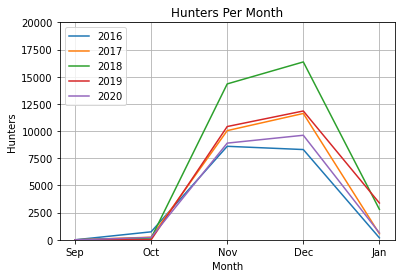

In [22]:
hm = ["Sep","Oct","Nov","Dec", "Jan"]

plt.axis([None, None, 0, 20000])
plt.title('Hunters Per Month')
plt.xlabel('Month')
plt.ylabel('Hunters')
plt.plot(hm, np.append(hmonths16[8:], hmonths16[0:1]), label="2016")
plt.plot(hm, np.append(hmonths17[8:], hmonths17[0:1]), label="2017")
plt.plot(hm, np.append(hmonths18[8:], hmonths18[0:1]), label="2018")
plt.plot(hm, np.append(hmonths19[8:], hmonths19[0:1]), label="2019")
plt.plot(hm, np.append(hmonths20[8:], hmonths20[0:1]), label="2020")
plt.grid(True)
plt.legend(loc="upper left")

# show and save the graph
plt.savefig('media/hunters_per_month.png', facecolor='white')

Plot all of the graphs together.

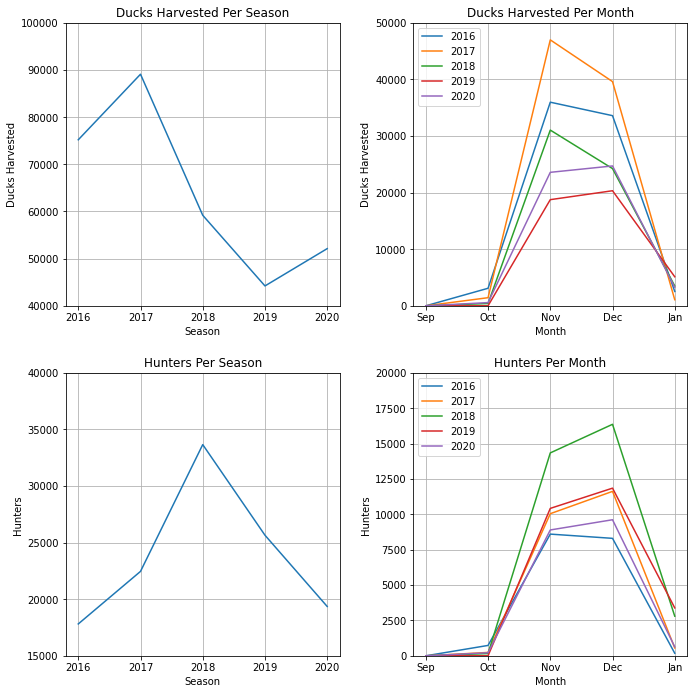

In [23]:
figure, axis = plt.subplots(2, 2)

# ducks harvested per season
axis[0, 0].axis([None, None, 40000, 100000])
axis[0, 0].set_title('Ducks Harvested Per Season')
axis[0, 0].set_xlabel('Season')
axis[0, 0].set_ylabel('Ducks Harvested')
axis[0, 0].plot(years, dh)
axis[0, 0].grid(True)

# ducks harvester per month
axis[0, 1].axis([None, None, 0, 50000])
axis[0, 1].set_title('Ducks Harvested Per Month')
axis[0, 1].set_xlabel('Month')
axis[0, 1].set_ylabel('Ducks Harvested')
axis[0, 1].plot(m, np.append(months16[8:], months16[0:1]), label="2016")
axis[0, 1].plot(m, np.append(months17[8:], months17[0:1]), label="2017")
axis[0, 1].plot(m, np.append(months18[8:], months18[0:1]), label="2018")
axis[0, 1].plot(m, np.append(months19[8:], months19[0:1]), label="2019")
axis[0, 1].plot(m, np.append(months20[8:], months20[0:1]), label="2020")    
axis[0, 1].grid(True)
axis[0, 1].legend(loc="upper left")

# hunters per season
axis[1, 0].axis([None, None, 15000, 40000])
axis[1, 0].set_title('Hunters Per Season')
axis[1, 0].set_xlabel('Season')
axis[1, 0].set_ylabel('Hunters')
axis[1, 0].plot(hy, hdh)
axis[1, 0].grid(True)

# hunters per month
axis[1, 1].axis([None, None, 0, 20000])
axis[1, 1].set_title('Hunters Per Month')
axis[1, 1].set_xlabel('Month')
axis[1, 1].set_ylabel('Hunters')
axis[1, 1].plot(m, np.append(hmonths16[8:], hmonths16[0:1]), label="2016")
axis[1, 1].plot(m, np.append(hmonths17[8:], hmonths17[0:1]), label="2017")
axis[1, 1].plot(m, np.append(hmonths18[8:], hmonths18[0:1]), label="2018")
axis[1, 1].plot(m, np.append(hmonths19[8:], hmonths19[0:1]), label="2019")
axis[1, 1].plot(m, np.append(hmonths20[8:], hmonths20[0:1]), label="2020")
axis[1, 1].grid(True)
axis[1, 1].legend(loc="upper left")

figure.set_figheight(10)
figure.set_figwidth(10)
figure.tight_layout(pad=2.0)

# show and save the graph
plt.savefig('media/graphs.png', facecolor='white')